## Dependencies

### Library Installation (if needed)

In [1]:
#! pip install -qUr requirements.txt

In [2]:
from methods.screener_methods import *
from tqdm import tqdm
import pandas as pd

### Single import

AOJ-B.CO


,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,Momentum Score,P/E Score,ROA Score,P/B Score,...,ROA%,EPS,P/B,D/E,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,AOJ-B.CO,Brdr. A & O Johansen A/S B,Buy,0.91,0.41,0.44,0.06,0.5,-0.01,0.03,...,4.29,6.7,1.69,0.81,0.0,0.02,Industrials,Industrial Distribution,Denmark,False


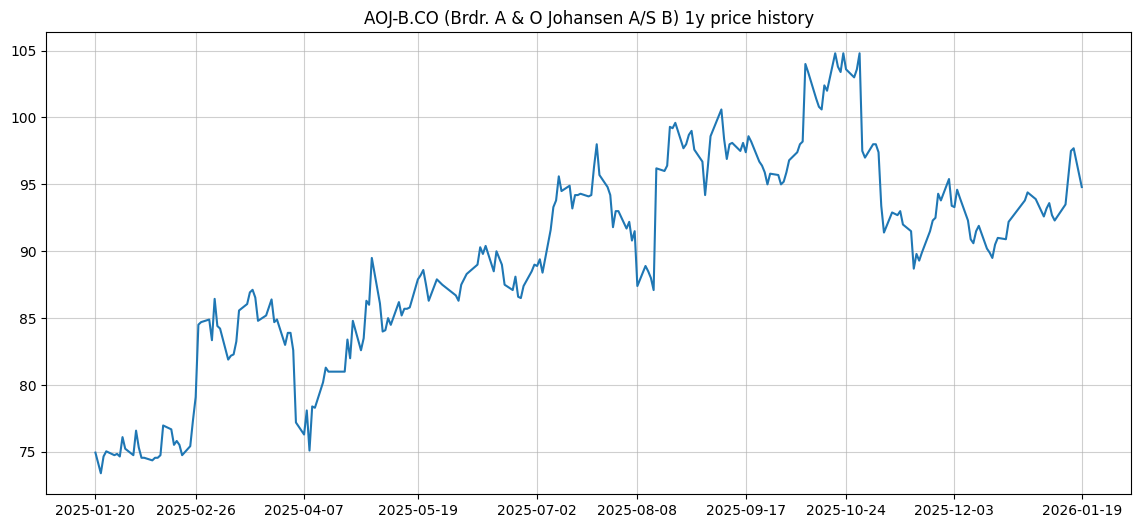

50d Average Change%: 0.02


In [3]:
symbol = "AOJ-B.CO"
stock = Stock(symbol)
print(stock.symbol)
display(stock.summary())
stock.price_graph("1y")
print(f"50d Average Change%: {round(stock.momentum, 2)}")

### Screener

In [4]:
symbol_list = "simple" #"simple", "danish", "filtered", "all"

if symbol_list == "all":
    symbols = (
        pd.read_csv("../data/tickers/tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].to_list()
    )
elif symbol_list == "filtered":
    symbols = pd.read_csv("../data/tickers/screener_filtered_tickers.csv")["Ticker"].tolist()
elif symbol_list == "danish":
    symbols = pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist()
else:
    symbols = pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].tolist()
symbols = list(set(symbols))

In [5]:
import sys, io
df = pd.DataFrame()
for symbol in tqdm(symbols, smoothing=0):
    old_stderr = sys.stderr
    sys.stderr = io.StringIO()
    try:
        df = pd.concat([df, Stock(symbol).summary()])
    except Exception:
        pass
    finally:
        sys.stderr = old_stderr
df = df.sort_values(by="Recommendation Score", ascending=False)
display(df)
if symbol_list == "simple":
    df.to_csv("../data/screener_results/simple_screener_results.csv", index=False)
elif symbol_list == "danish":
    df.to_csv("../data/screener_results/danish_screener_results.csv", index=False)
elif symbol_list == "filtered" or symbol_list == "all":   
    df.to_csv("../data/screener_results/screener_results.csv", index=False)
    df["Ticker"].to_csv("../data/tickers/screener_filtered_tickers.csv", index=False)

100%|██████████| 81/81 [00:55<00:00,  1.46it/s]


,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,Momentum Score,P/E Score,ROA Score,P/B Score,...,ROA%,EPS,P/B,D/E,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,BAVA.CO,Bavarian Nordic A/S,Buy,2.41,2.02,0.36,0.03,0.96,0.83,0.09,...,7.78,30.71,1.14,0.01,0.0,0.01,Healthcare,Biotechnology,Denmark,False
0,TRMD,TORM plc,Buy,1.93,1.65,0.16,0.13,0.89,0.58,0.10,...,5.99,2.73,1.03,0.42,0.0,0.06,Energy,Oil & Gas Midstream,United Kingdom,True
0,HLUN-A.CO,H. Lundbeck A/S A,Buy,1.92,1.77,0.02,0.14,0.81,0.85,0.06,...,8.28,3.84,1.49,0.49,0.0,0.06,Healthcare,Drug Manufacturers - Specialty & Generic,Denmark,True
0,MTHH.CO,MT Højgaard Holding A/S,Buy,1.81,1.40,0.20,0.21,0.70,0.71,-0.14,...,6.62,44.91,3.50,0.20,0.0,0.11,Industrials,Engineering & Construction,Denmark,True
0,ZEAL.CO,Zealand Pharma A/S,Buy,1.80,2.05,0.02,-0.26,1.00,0.90,0.00,...,33.45,91.28,1.85,0.03,0.0,-0.17,Healthcare,Biotechnology,Denmark,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,UBER,"Uber Technologies, Inc.",Sell,-1.02,-0.85,-0.14,-0.04,-1.09,0.33,-0.15,...,5.16,1.94,6.27,0.46,-1.7,-0.02,Technology,Software - Application,United States,False
0,VWS.CO,Vestas Wind Systems A/S,Sell,-1.10,-1.42,0.16,0.16,-0.70,-0.43,-0.15,...,3.19,6.94,6.89,0.96,0.0,0.07,Industrials,Specialty Industrial Machinery,Denmark,False
0,SOLAR-B.CO,Solar B A/S,Sell,-1.55,-1.81,0.22,0.04,-1.10,-0.69,0.12,...,2.15,3.53,0.85,1.09,0.0,0.02,Technology,Electronics & Computer Distribution,Denmark,False
0,HARB-B.CO,Harboes Bryggeri B A/S,Sell,-1.63,-1.60,0.03,-0.06,-1.10,-0.75,0.13,...,1.70,2.03,0.64,0.23,0.0,-0.02,Consumer Defensive,Beverages - Brewers,Denmark,False
